# Homework 3

1.  
    *   Run k-means on the digits data with 10 clusters.
    *   Plot the final cluster centers reshaped as an image.
    *   Calculate the accuracy. (You can get the actual label of a cluster by checking i.e. the mode of the targets of datapoints inside that cluster.)

2.   
    *   Sample a random subset of the 10 possible digits (don't look at it).
    *   Filter the digits data and keep only these digits.
    *   Find out the size of the random subset using silhouette analysis.
    *   Rerun a clustering alg. with the correct cluster number and plot the cluster centers to find out exactly which subset you sampled.

**Deadline: 2022.05.06. 23:59**

# Setup

## Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

from scipy.stats import mode

## Silhouette function def

In [2]:
#@title Silhouette function def

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

#Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


def silhouette(X, y, range_n_clusters, seed = 0):
  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      clusterer = KMeans(n_clusters=n_clusters, random_state=seed)
      cluster_labels = clusterer.fit_predict(X)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(X, cluster_labels)
      print(
          "For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg,
      )

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(X, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(
              np.arange(y_lower, y_upper),
              0,
              ith_cluster_silhouette_values,
              facecolor=color,
              edgecolor=color,
              alpha=0.7,
          )

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
      ax2.scatter(
          X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
      )

      # Labeling the clusters
      centers = clusterer.cluster_centers_
      # Draw white circles at cluster centers
      ax2.scatter(
          centers[:, 0],
          centers[:, 1],
          marker="o",
          c="white",
          alpha=1,
          s=200,
          edgecolor="k",
      )

      for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")

      plt.suptitle(
          "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
          % n_clusters,
          fontsize=14,
          fontweight="bold",
      )

  plt.show()

## Digits dataset

In [3]:
digits = load_digits()
X = digits.data
print(digits.DESCR)
print(X.shape)
print(digits.target.shape)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## Part1

In [4]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters)
y_kmeans = kmeans.fit_predict(X)

In [5]:
kmeans.cluster_centers_.shape

(10, 64)

In [6]:
kmeans.cluster_centers_.reshape(10, 8, 8).shape

(10, 8, 8)

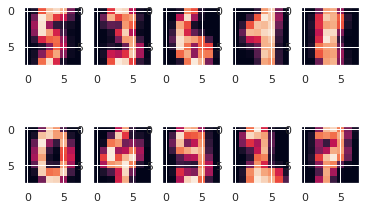

In [7]:
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
f, ax = plt.subplots(2, 5)
for k in range(10):
   ax[k // 5, k % 5].imshow(centers[k, :, :])

In [8]:
labels = np.zeros_like(y_kmeans)
for i in range(10):
    labels[(y_kmeans == i)] = mode(digits.target[(y_kmeans == i)])[0]
accuracy_score(digits.target, labels)

0.7913188647746243

## Part2

In [35]:
sample = np.random.choice(range(10), size=np.random.randint(low=2, high=10))
mask = np.isin(digits.target, sample)

For n_clusters = 2 The average silhouette_score is : 0.20515572922537065
For n_clusters = 3 The average silhouette_score is : 0.23369441244703884
For n_clusters = 4 The average silhouette_score is : 0.2836138600031855
For n_clusters = 5 The average silhouette_score is : 0.27043309448230063
For n_clusters = 6 The average silhouette_score is : 0.2575293644662892
For n_clusters = 7 The average silhouette_score is : 0.22493098908428824
For n_clusters = 8 The average silhouette_score is : 0.22275680635299178
For n_clusters = 9 The average silhouette_score is : 0.1557059911597542


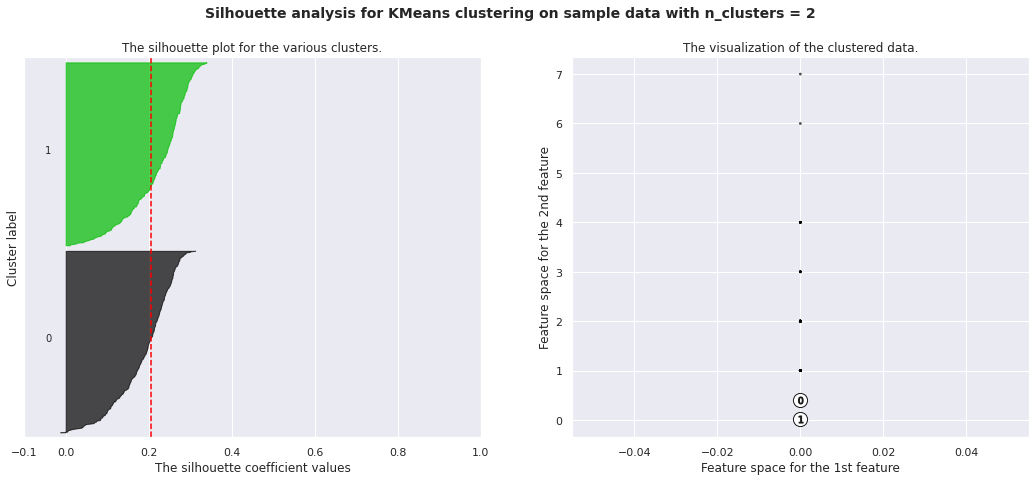

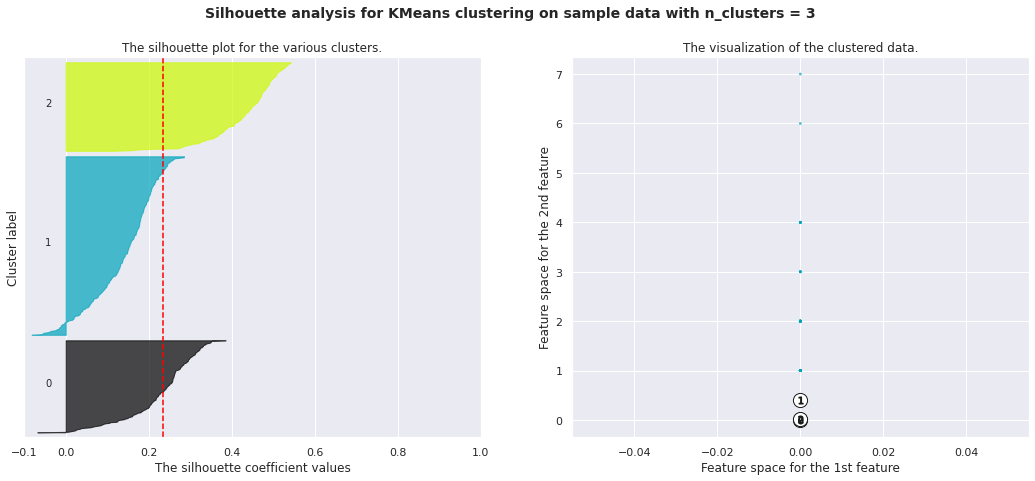

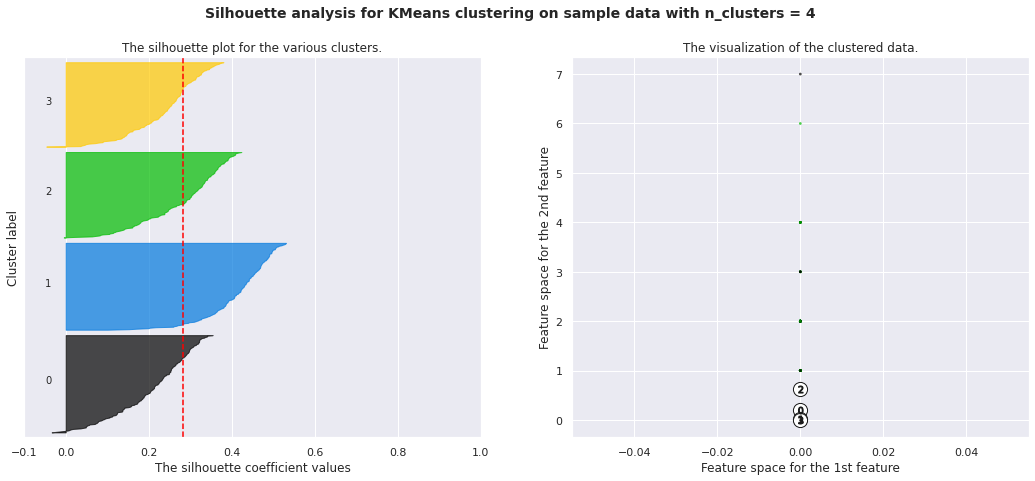

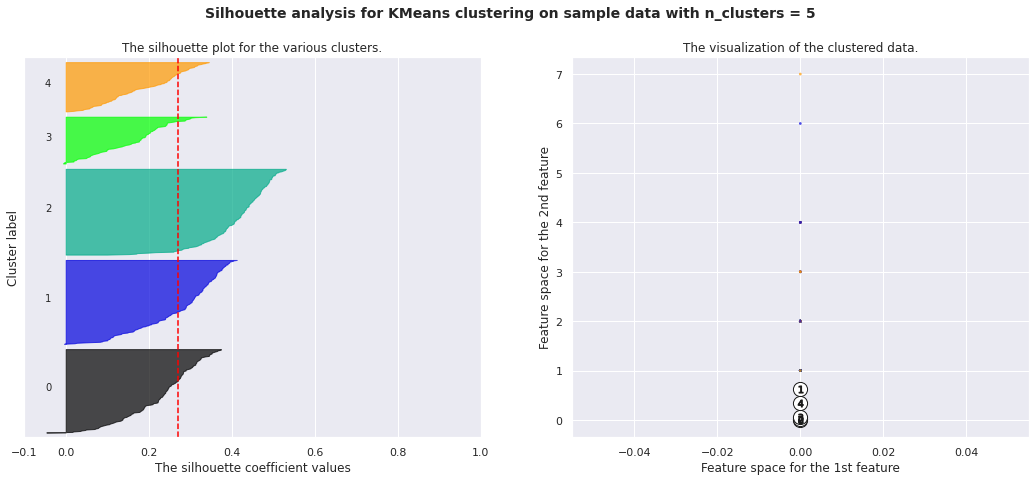

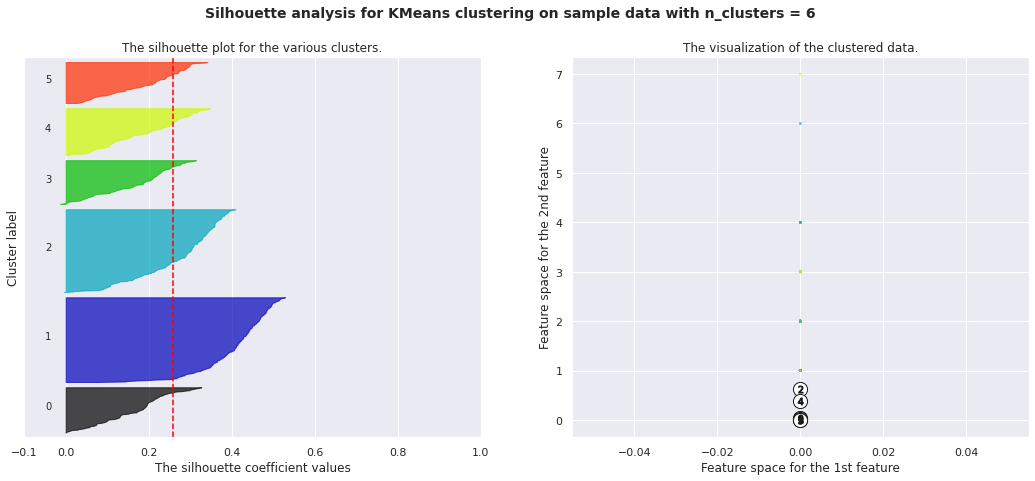

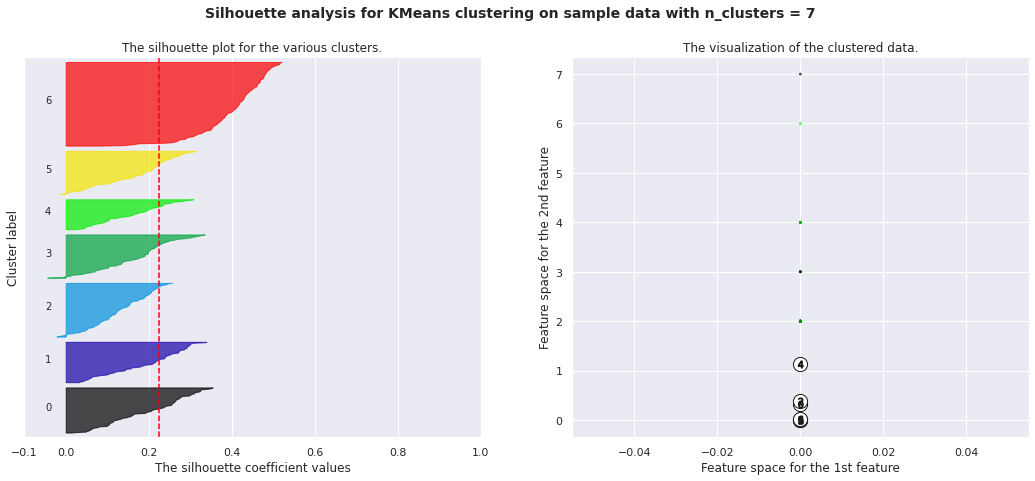

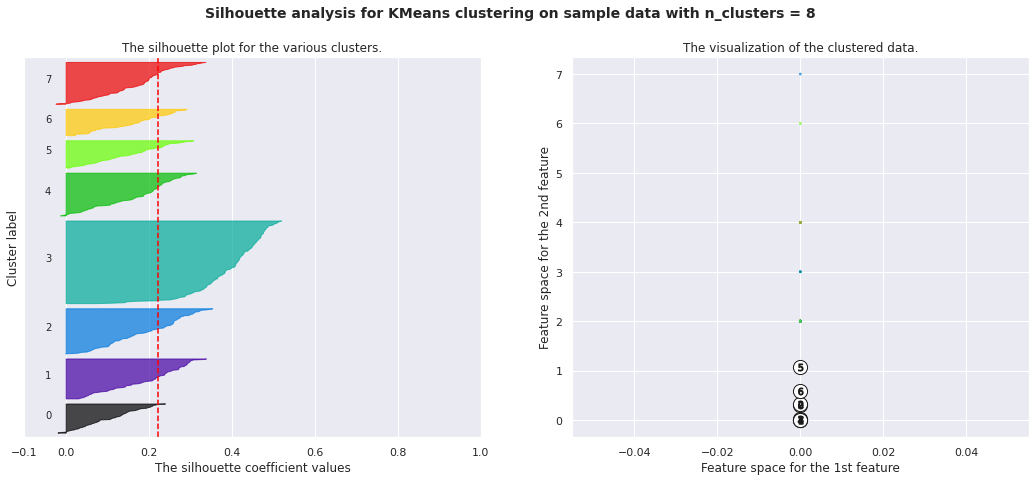

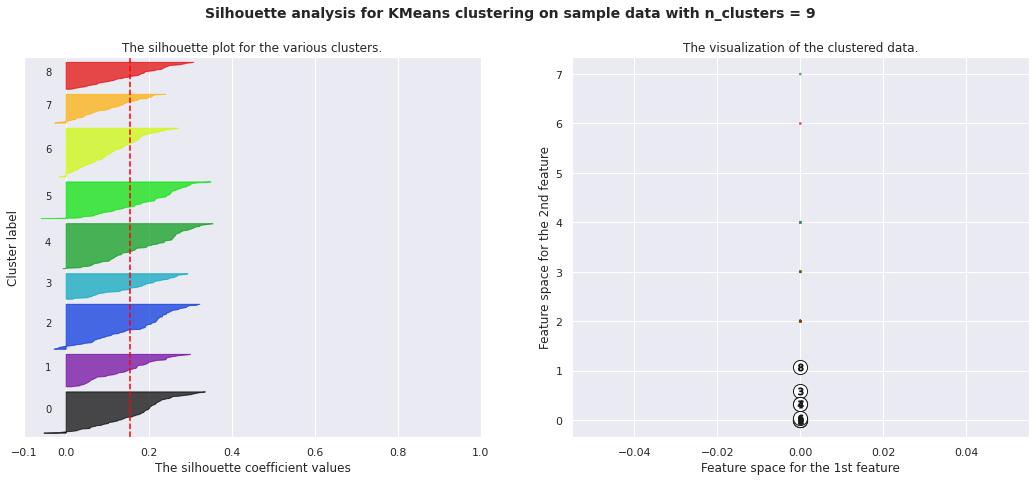

In [36]:
range_n_clusters = list(range(2, 10))
silhouette(X[mask], digits.target[mask], range_n_clusters)

Based on the silhouette analysis the size of the random subset is 4.

In [37]:
sample

array([4, 0, 3, 7])

In [39]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
y_kmeans = kmeans.fit_predict(X[mask])

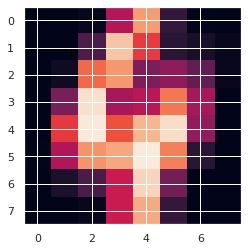

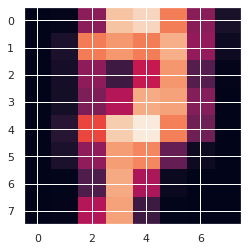

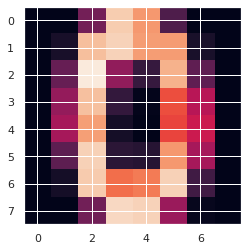

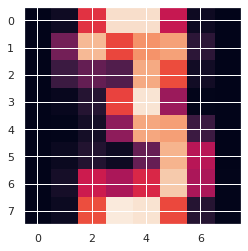

In [40]:
centers = kmeans.cluster_centers_.reshape(n_clusters, 8, 8)
for k in range(n_clusters):
   plt.figure()
   plt.imshow(centers[k, :, :])
   plt.show()